In [1]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier

from src.data_prep import y_train, y_test, tf_idf_data_train, tf_idf_data_test
from src.visualizations import evaluate_model, confusion_matrix_heat_map

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
pipe = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('XGBC', XGBClassifier(random_state=0))])

In [3]:
parameters = {'XGBC__max_depth': [7],
              'XGBC__min_child_weight': [0.5]}

In [4]:
xgb_classifier = GridSearchCV(pipe, parameters, cv=3, n_jobs= -1)
xgb_classifier.fit(tf_idf_data_train, y_train)
print(xgb_classifier.best_estimator_)

Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=0, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('XGBC',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bytree=1, gamma=0,
                               learning_rate=0.1, max_delta_step=0, max_depth=7,
                               min_child_weight=0.5, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=True, subsample=1))],
         verbose=False)


In [5]:
evaluate_model(tf_idf_data_train, y_train, tf_idf_data_test, y_test, xgb_classifier)

Training Score:0.6721089357089628
Cross V Score: 0.5865452881820019 +/- 0.007302620440289829
Testing Score: 0.5876854297906929
Cross & Test Diff: 0.0011401416086910254
Standard Deviations Away: 0.15612773770914692
[[ 416  696  199]
 [ 139 1761  247]
 [ 129  619  715]]


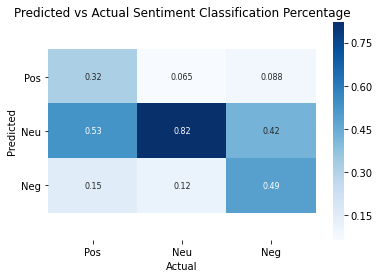

In [6]:
confusion_matrix_heat_map(xgb_classifier, tf_idf_data_test, y_test)